In [17]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import scipy.stats as sts

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<Axes: xlabel='sex', ylabel='count'>

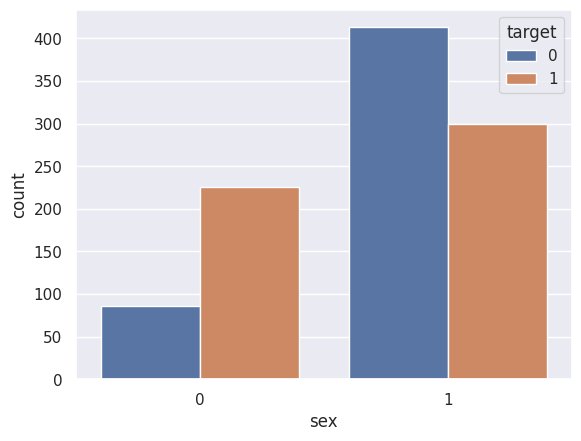

In [3]:
sns.countplot(data=df,x="sex",hue='target')

<Axes: xlabel='age', ylabel='Count'>

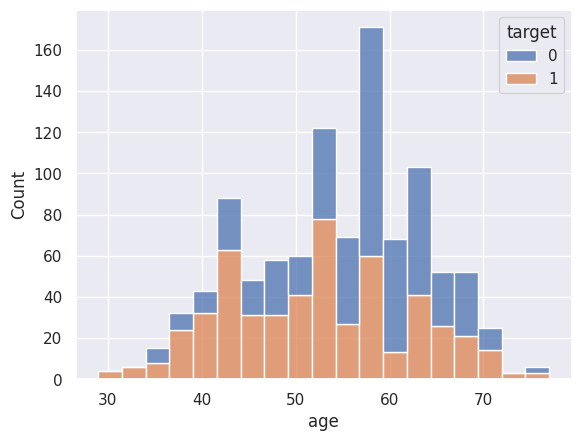

In [4]:
sns.histplot(data=df, x="age", hue="target", multiple="stack")

<Axes: xlabel='chol', ylabel='Count'>

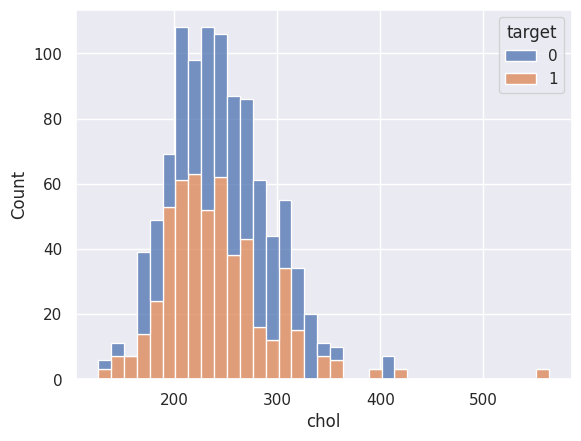

In [5]:
sns.histplot(data=df, x="chol", hue="target", multiple="stack")

<Axes: xlabel='trestbps', ylabel='Count'>

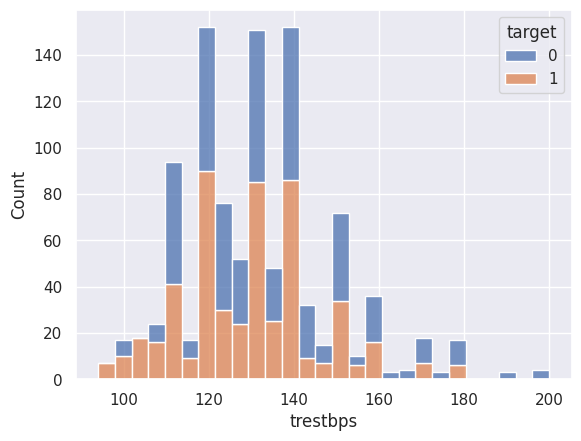

In [6]:
sns.histplot(data=df, x="trestbps", hue="target", multiple="stack")

In [7]:
df.target.value_counts()

,count
target,
1,526
0,499


<Axes: xlabel='age'>

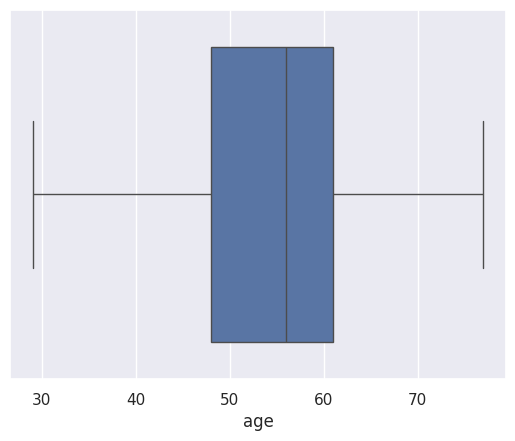

In [8]:
sns.boxplot(x=df["age"])

<Axes: xlabel='trestbps'>

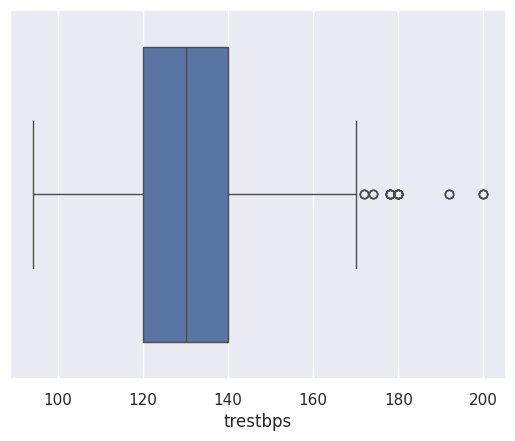

In [9]:
sns.boxplot(x=df["trestbps"])

<Axes: xlabel='chol'>

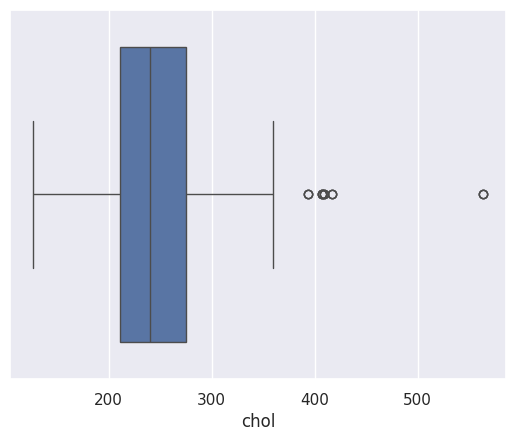

In [10]:
sns.boxplot(x=df["chol"])

<Axes: xlabel='thalach'>

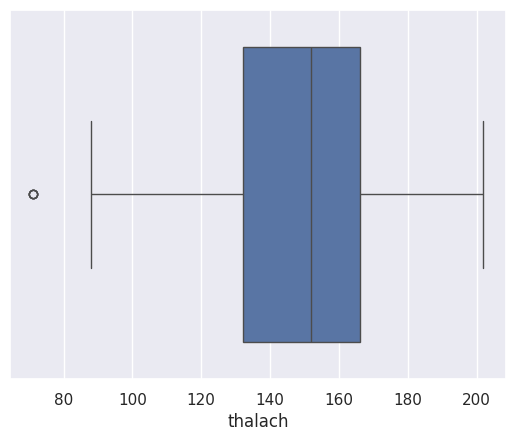

In [11]:
sns.boxplot(x=df["thalach"])

In [12]:
z = np.abs(sts.zscore(df))
dc = df[(z<3).all(axis=1)]
dc.shape

(969, 14)

In [13]:
x = dc.drop('target',axis=1)
y = dc['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy_score",round(accuracy_score(y_test,y_pred)*100,2))

Accuracy_score 100.0


In [18]:
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  1.0
Precision Score :  1.0
Recall Score :  1.0


In [19]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("Accuracy_score",round(accuracy_score(y_test,y_pred)*100,2))

print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

Accuracy_score 100.0
F-1 Score :  1.0
Precision Score :  1.0
Recall Score :  1.0


In [20]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)
print("Accuracy_score",round(accuracy_score(y_test,y_pred)*100,2))
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

Accuracy_score 88.14
F-1 Score :  0.8888888888888888
Precision Score :  0.9019607843137255
Recall Score :  0.8761904761904762
